<a href="https://colab.research.google.com/github/BuczynskiRafal/digit-recognition/blob/main/Digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalacja bibliotek


In [13]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import bibliotek

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from sklearn import datasets
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

sns.set(font_scale=1.3)
np.random.seed(42)

# Wczytanie danych

In [16]:
raw_digits = datasets.load_digits()
digits = raw_digits.copy()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [17]:
images = digits['images']
targets = digits['target']

# kształt danych
print(images.shape)
print(target.shape)

(1797, 8, 8)
()


In [18]:
# tablica 8x8, tak jak pokazał shape
images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

# Przykłdowe obrazy

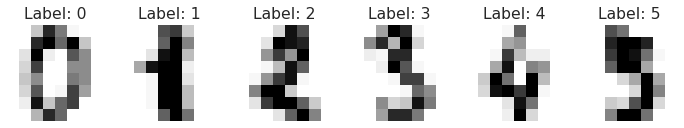

In [19]:
plt.figure(figsize=(12, 10))
for idx, (img, targ) in enumerate(list(zip(images, targets))[:6]):
    plt.subplot(2, 6, idx + 1)
    plt.axis('off')
    plt.imshow(img, cmap='Greys')
    plt.title(f"Label: {targ}")

# Przygotowanie danych do modelu

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, targets)

print(X_train.shape)
print(X_test.shape)
print('jak widać wymairy próbki to 8x8, tego nie da się wrzucić do modelu dlatego trzeba spłaszczyć dane')
print(y_train.shape)
print(y_test.shape)

# wypłaszczenie danych
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

print('płaskie dane')
print(X_train.shape)
print(X_test.shape)


(1347, 8, 8)
(450, 8, 8)
jak widać wymairy próbki to 8x8, tego nie da się wrzucić do modelu dlatego trzeba spłaszczyć dane
(1347,)
(450,)
(1347, 64)
(450, 64)


In [24]:
# teraz zamiast tabicy 8x8 mamy array z 64 elementami 
X_train[0]


array([ 0.,  0.,  9.,  9.,  4.,  0.,  0.,  0.,  0.,  0., 15., 15., 14.,
       12.,  0.,  0.,  0.,  3., 10.,  1.,  0., 12.,  5.,  0.,  0.,  5.,
        8.,  0.,  0.,  8.,  6.,  0.,  0.,  8.,  8.,  0.,  0.,  8.,  8.,
        0.,  0.,  5.,  8.,  0.,  0., 10.,  6.,  0.,  0.,  4., 13.,  4.,
        6., 13.,  0.,  0.,  0.,  0.,  6., 16., 14.,  3.,  0.,  0.])

In [25]:
y_test[0]

5

# Trenowanie modelu kernel='linear'

In [29]:
from sklearn.svm import SVC

clf = SVC(gamma=0.001, kernel='linear').fit(X_train, y_train)

# dokładność
clf.score(X_test, y_test)

0.9755555555555555

# Trenowanie modelu kermel='rbf'

In [30]:
from sklearn.svm import SVC

clf = SVC(gamma=0.001, kernel='rbf').fit(X_train, y_train)

clf.score(X_test, y_test)

0.9911111111111112

# Ocena modelu

In [31]:
# elementy które przewidział model ze zbioru testowego
y_pred = clf.predict(X_test)
y_pred

array([5, 3, 5, 6, 0, 7, 0, 7, 4, 7, 2, 4, 8, 7, 0, 4, 6, 2, 0, 3, 6, 5,
       6, 7, 4, 2, 1, 0, 2, 5, 7, 2, 7, 6, 7, 8, 5, 5, 1, 8, 8, 7, 0, 1,
       4, 6, 7, 0, 5, 9, 8, 3, 1, 5, 4, 7, 8, 9, 7, 0, 5, 8, 6, 5, 0, 8,
       4, 0, 5, 2, 0, 1, 9, 2, 2, 3, 7, 0, 5, 3, 5, 2, 3, 9, 9, 9, 0, 4,
       9, 3, 7, 7, 2, 9, 3, 9, 0, 5, 9, 9, 1, 7, 6, 1, 6, 8, 6, 8, 2, 1,
       8, 1, 9, 4, 1, 8, 6, 7, 6, 6, 4, 9, 2, 5, 3, 0, 9, 0, 4, 1, 2, 7,
       3, 9, 7, 0, 1, 0, 0, 2, 5, 0, 1, 2, 8, 8, 4, 2, 2, 0, 8, 5, 5, 0,
       7, 3, 1, 1, 4, 4, 4, 6, 4, 6, 1, 0, 2, 1, 6, 2, 5, 7, 9, 2, 2, 2,
       0, 5, 8, 2, 0, 3, 5, 2, 1, 7, 7, 5, 2, 8, 9, 5, 2, 8, 6, 2, 3, 7,
       2, 0, 7, 5, 6, 0, 2, 0, 8, 1, 5, 9, 9, 6, 4, 0, 3, 1, 8, 1, 6, 2,
       7, 1, 0, 4, 3, 4, 7, 1, 2, 6, 5, 4, 1, 8, 3, 2, 6, 3, 0, 5, 5, 8,
       8, 6, 8, 8, 9, 7, 9, 9, 4, 7, 0, 9, 9, 3, 4, 8, 7, 2, 8, 9, 6, 3,
       8, 5, 9, 8, 2, 8, 3, 8, 4, 3, 6, 9, 2, 3, 7, 9, 0, 5, 8, 2, 8, 6,
       7, 1, 6, 8, 4, 8, 7, 0, 0, 9, 4, 2, 9, 8, 1,

In [33]:
# sprawdzenie korelacji y_pred z y_test
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        54
           1       1.00      1.00      1.00        41
           2       1.00      1.00      1.00        50
           3       1.00      0.93      0.96        41
           4       1.00      1.00      1.00        38
           5       0.97      1.00      0.99        39
           6       1.00      1.00      1.00        42
           7       0.96      1.00      0.98        48
           8       0.98      1.00      0.99        52
           9       1.00      0.98      0.99        45

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [34]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[54,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 50,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 38,  0,  0,  0,  2,  1,  0],
       [ 0,  0,  0,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 42,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 48,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 52,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0, 44]])

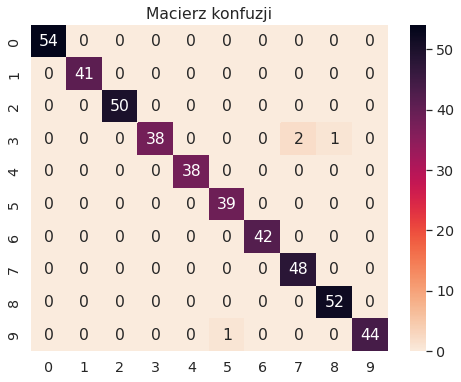

In [35]:
# utworzenie heatmapy
plt.figure(figsize=(8, 6))
plt.title('Macierz konfuzji')
_ = sns.heatmap(cm, annot=True, cmap=sns.cm.rocket_r)

In [36]:
columns = ['pred_' + str(i) for i in range(10)]
index = ['true_' + str(i) for i in range(10)]

def plot_confusion_matrix(cm):
    # Mulitclass classification, 3 classes
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=columns, index=index[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), 
                                      colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=700, height=500, title='Confusion Matrix', font_size=16)
    fig.show()

plot_confusion_matrix(cm)

# Wyświetlenie błędnych predykcji

In [37]:
results = pd.DataFrame(data={'y_pred': y_pred,
                             'y_true': y_test
                             })
results.head(10)

,y_pred,y_true
0,5,5
1,3,3
2,5,5
3,6,6
4,0,0
5,7,7
6,0,0
7,7,7
8,4,4
9,7,7


In [38]:
from os import listxattr
# indeksy elementów w których model się pomylił
errors = results[results['y_true'] != results['y_pred']]
errors_idx = list(errors.index)
errors_idx

[182, 286, 334, 438]

In [39]:
# podgląd tych indeksów
results.loc[errors_idx, :]

,y_pred,y_true
182,5,9
286,7,3
334,8,3
438,7,3


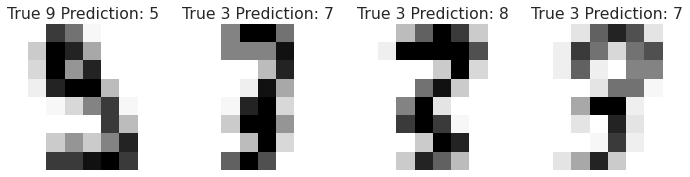

In [42]:
plt.figure(figsize=(12, 10))
for idx, error_idx in enumerate(errors_idx[:4]):
    image = X_test[error_idx].reshape(8, 8)
    plt.subplot(2, 4, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap='Greys')
    plt.title(f"True {results.loc[error_idx, 'y_true']} Prediction: {results.loc[error_idx, 'y_pred']}")